# Archisha Sinha

## Domain: Reinforcement Learning
## Topic: Implementation of MultiArm Bandit Problem

##Multi-Arm Bandit Problem:

The Multi-Arm Bandit (MAB) problem is a classic reinforcement-learning problem that explores the trade-off between exploitation (choosing the best-known option) and exploration (trying new options to discover their potential). In this problem, an agent is faced with multiple slot machines (referred to as arms), each with an unknown probability of winning. The agent's goal is to maximize the total reward over a series of trials by deciding which arm to pull in each trial.



###1. **Exploration**

Exploration refers to the strategy where an agent tries out different actions to gather more information about their potential rewards. In the context of the Multi-Arm Bandit problem, this means pulling different arms to learn more about their reward distributions.

### 2. **Exploitation**

Exploitation involves selecting the action that is currently believed to be the best based on experiences. In the Multi-Arm Bandit problem, this means always pulling the arm with the highest estimated reward.

### 4. **Epsilon-Greedy Algorithm**

The epsilon-greedy algorithm is a simple and effective strategy that combines both exploration and exploitation. The key idea is to choose the best-known action most of the time, but occasionally explore other actions. This balance is controlled by a parameter, epsilon (ε)


## Task to be completed:

### A) Take value of arm as n=5 and number of trials t =500, Positive Reward =1, Negative Reward =0

1. Implement Exploration
2. Implement Exploitation
3. Implement Fixed Exploration and then Exploitation
4. Implement  greedy
5. Fine tune the value of  and encapsulate  your observations
6. Compare the algorithms in terms or complexity, value and regret
7. Incorporate UCB in  greedy and state your opinion


### B) Take different values of n and t and summarize your observations
### C) Give two real world applications of MAB


## 10 Arm Bandit Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
k = 10          # Number of bandits
epsilon = 0.1   # Exploration rate
steps = 1000    # Number of steps

# Initialize
true_means = np.random.randn(k)  # True means of the bandits' rewards
est_means = np.zeros(k)          # Estimated means of the bandits' rewards
counts = np.zeros(k)             # Number of times each bandit was pulled
rewards = []

In [3]:
def select_action(epsilon, est_means):
    # Select an action using the epsilon-greedy strategy
    if np.random.rand() < epsilon:
        return np.random.choice(k)  # Explore
    else:
        return np.argmax(est_means)  # Exploit

def pull_bandit(bandit):
    #Pull the lever of a specified bandit and get a reward
    return np.random.randn() + true_means[bandit]

def update_estimates(action, reward):
    # Update the estimated mean reward for the selected bandit
    counts[action] += 1
    est_means[action] += (reward - est_means[action]) / counts[action]

# Run the simulation
for _ in range(steps):
    action = select_action(epsilon, est_means)
    reward = pull_bandit(action)
    update_estimates(action, reward)
    rewards.append(reward)

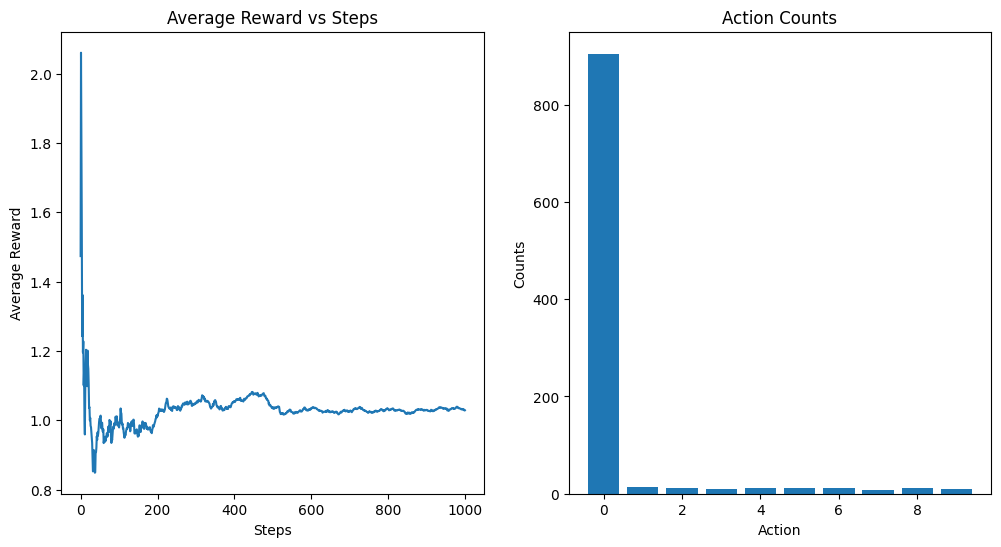

In [4]:
# Plot results
plt.figure(figsize=(12, 6))

# Average reward over time
plt.subplot(1, 2, 1)
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / (np.arange(steps) + 1)
plt.plot(average_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps')

# Action counts
plt.subplot(1, 2, 2)
plt.bar(range(k), counts)
plt.xlabel('Action')
plt.ylabel('Counts')
plt.title('Action Counts')

plt.show()

##Multi-armed bandit problem

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_arms = 5
n_trials = 500
positive_reward = 1
negative_reward = 0

# Initialize
true_means = np.random.rand(n_arms)  # True mean rewards for each arm
counts = np.zeros(n_arms)           # Number of times each arm was pulled
est_means = np.zeros(n_arms)        # Estimated mean rewards for each arm
rewards = {strategy: [] for strategy in ['exploration', 'exploitation', 'fixed_exploration', 'epsilon_greedy', 'ucb']}


In [6]:
# Exploration
def exploration_strategy():
    for _ in range(n_trials):
        action = np.random.choice(n_arms)
        reward = np.random.choice([positive_reward, negative_reward])
        rewards['exploration'].append(reward)
        counts[action] += 1

In [7]:
# Exploitation
def exploitation_strategy():
    for _ in range(n_trials):
        action = np.argmax(est_means)
        reward = np.random.choice([positive_reward, negative_reward])
        rewards['exploitation'].append(reward)
        counts[action] += 1
        est_means[action] = (est_means[action] * (counts[action] - 1) + reward) / counts[action]

In [8]:
# Fixed Exploration and Then Exploitation
def fixed_exploration_then_exploitation_strategy(explore_for=100):
    for _ in range(explore_for):
        action = np.random.choice(n_arms)
        reward = np.random.choice([positive_reward, negative_reward])
        rewards['fixed_exploration'].append(reward)
        counts[action] += 1

    for _ in range(n_trials - explore_for):
        action = np.argmax(est_means)
        reward = np.random.choice([positive_reward, negative_reward])
        rewards['fixed_exploration'].append(reward)
        counts[action] += 1
        est_means[action] = (est_means[action] * (counts[action] - 1) + reward) / counts[action]

In [9]:
# Epsilon-Greedy Strategy
def epsilon_greedy_strategy(epsilon=0.1):
    for _ in range(n_trials):
        if np.random.rand() < epsilon:
            action = np.random.choice(n_arms)
        else:
            action = np.argmax(est_means)
        reward = np.random.choice([positive_reward, negative_reward])
        rewards['epsilon_greedy'].append(reward)
        counts[action] += 1
        est_means[action] = (est_means[action] * (counts[action] - 1) + reward) / counts[action]

In [10]:
# Upper Confidence Bound (UCB)
def ucb_strategy():
    n = np.zeros(n_arms)  # Number of times each arm was pulled
    total_reward = 0
    for t in range(n_trials):
        if np.min(n) == 0:
            # Ensure each arm is pulled at least once
            action = np.argmin(n)
        else:
            ucbs = est_means + np.sqrt(2 * np.log(t + 1) / n)
            action = np.argmax(ucbs)

        reward = np.random.choice([positive_reward, negative_reward])
        rewards['ucb'].append(reward)
        total_reward += reward
        counts[action] += 1
        n[action] += 1
        est_means[action] = (est_means[action] * (counts[action] - 1) + reward) / counts[action]

In [11]:
# Run simulations and collect results
def run_simulation(strategy, *args):
    global est_means, counts
    est_means = np.zeros(n_arms)
    counts = np.zeros(n_arms)
    rewards[strategy] = []
    if strategy == 'exploration':
        exploration_strategy()
    elif strategy == 'exploitation':
        exploitation_strategy()
    elif strategy == 'fixed_exploration':
        fixed_exploration_then_exploitation_strategy(*args)
    elif strategy == 'epsilon_greedy':
        epsilon_greedy_strategy(*args)
    elif strategy == 'ucb':
        ucb_strategy()

# Run all strategies
run_simulation('exploration')
run_simulation('exploitation')
run_simulation('fixed_exploration',100)  #explore for = 100
run_simulation('epsilon_greedy',0.1) #epsilon = 0.1
run_simulation('ucb')

In [12]:
# Compute cumulative rewards and regrets
def compute_metrics(strategy):
    cumulative_rewards = np.cumsum(rewards[strategy])
    average_rewards = cumulative_rewards / (np.arange(len(rewards[strategy])) + 1)
    optimal_reward = np.max(true_means)
    regret = (optimal_reward - np.array(rewards[strategy])).cumsum()
    return average_rewards, regret

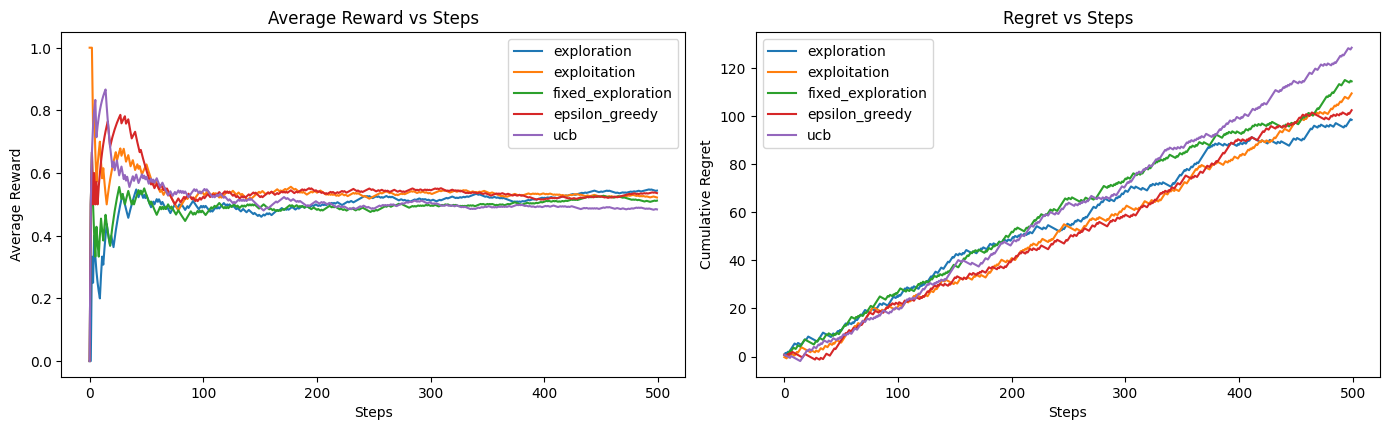

In [13]:
# Plot results
plt.figure(figsize=(14, 8))

# Average reward over time
plt.subplot(2, 2, 1)
for strategy in ['exploration', 'exploitation', 'fixed_exploration', 'epsilon_greedy', 'ucb']:
    avg_reward, _ = compute_metrics(strategy)
    plt.plot(avg_reward, label=strategy)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps')
plt.legend()

# Regret over time
plt.subplot(2, 2, 2)
for strategy in ['exploration', 'exploitation', 'fixed_exploration', 'epsilon_greedy', 'ucb']:
    _, regret = compute_metrics(strategy)
    plt.plot(regret, label=strategy)
plt.xlabel('Steps')
plt.ylabel('Cumulative Regret')
plt.title('Regret vs Steps')
plt.legend()

plt.tight_layout()
plt.show()

## UPPER CONFIDENCE BOUND

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
# Number of arms and rounds
n_arms = 10  # Number of actions
n_rounds = 1000  # Number of time steps

# Initialize rewards and selections
rewards = [0] * n_arms
selections = [0] * n_arms
total_reward = 0

# Exploration parameter
c = 2

# Simulated true rewards for each arm (unknown to the algorithm)
true_rewards = np.random.rand(n_arms)

In [16]:
# Upper Confidence Bound implementation
for t in range(1, n_rounds + 1):
    arm = 0
    max_upper_bound = 0

    for i in range(n_arms):
        if selections[i] > 0:
            average_reward = rewards[i] / selections[i]
            confidence_interval = c * math.sqrt(math.log(t) / selections[i])
            upper_bound = average_reward + confidence_interval
        else:
            upper_bound = float('inf')

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            arm = i

    # Simulate reward for the selected arm
    reward = np.random.binomial(1, true_rewards[arm])

    # Update the selections and rewards
    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward

In [17]:
# Output results
print(f"Total reward after {n_rounds} rounds: {total_reward}")
print(f"Number of selections for each arm: {selections}")

Total reward after 1000 rounds: 825
Number of selections for each arm: [306, 320, 28, 63, 24, 23, 72, 75, 72, 17]


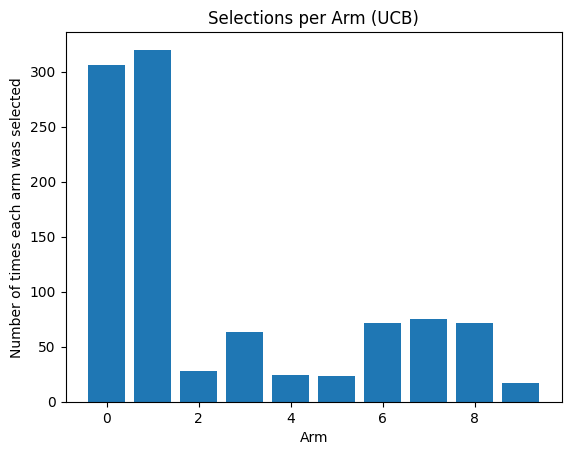

In [18]:
# Visualization
plt.bar(range(n_arms), selections)
plt.xlabel('Arm')
plt.ylabel('Number of times each arm was selected')
plt.title('Selections per Arm (UCB)')
plt.show()

## UCB in Epsilon Greedy strategy

Total reward after 1000 rounds: 792
Number of selections for each arm: [39, 30, 347, 145, 123, 43, 53, 35, 163, 22]


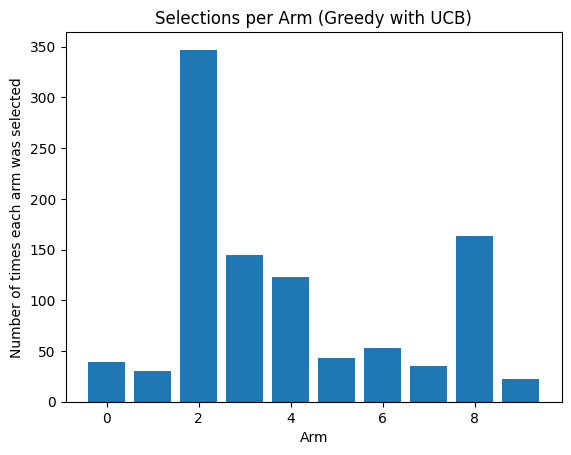

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Number of arms and rounds
n_arms = 10  # Number of actions
n_rounds = 1000  # Number of time steps

# Initialize rewards and selections
rewards = [0] * n_arms
selections = [0] * n_arms
total_reward = 0

# Exploration parameter
c = 2

# Simulated true rewards for each arm (unknown to the algorithm)
true_rewards = np.random.rand(n_arms)

# Greedy algorithm with UCB
for t in range(1, n_rounds + 1):
    arm = 0
    max_upper_bound = 0

    for i in range(n_arms):
        if selections[i] > 0:
            average_reward = rewards[i] / selections[i]
            confidence_interval = c * math.sqrt(math.log(t) / selections[i])
            upper_bound = average_reward + confidence_interval
        else:
            upper_bound = float('inf')

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            arm = i

    # Simulate reward for the selected arm
    reward = np.random.binomial(1, true_rewards[arm])

    # Update the selections and rewards
    selections[arm] += 1
    rewards[arm] += reward
    total_reward += reward

# Output results
print(f"Total reward after {n_rounds} rounds: {total_reward}")
print(f"Number of selections for each arm: {selections}")

# Visualization
plt.bar(range(n_arms), selections)
plt.xlabel('Arm')
plt.ylabel('Number of times each arm was selected')
plt.title('Selections per Arm (Greedy with UCB)')
plt.show()

 #### A standard greedy algorithm is short-sighted and prone to exploitation, incorporating UCB introduces a strategic exploration component, making the decision process more balanced and often resulting in improved outcomes.

Observations:
1. Exploration strategy provides high exploration but low cumulative reward.
2. Exploitation strategy can be very effective but may get stuck in local optima if the true means are not well explored.
3. Fixed Exploration and then Exploitation can offer a good balance, depending on the exploration phase length.
4. ε-greedy offers a good trade-off between exploration and exploitation. Tuning ε can improve performance.
5. UCB provides an adaptive way of balancing exploration and exploitation and generally performs well across scenarios.

2. 	Take different values of n and t and summarize your observations

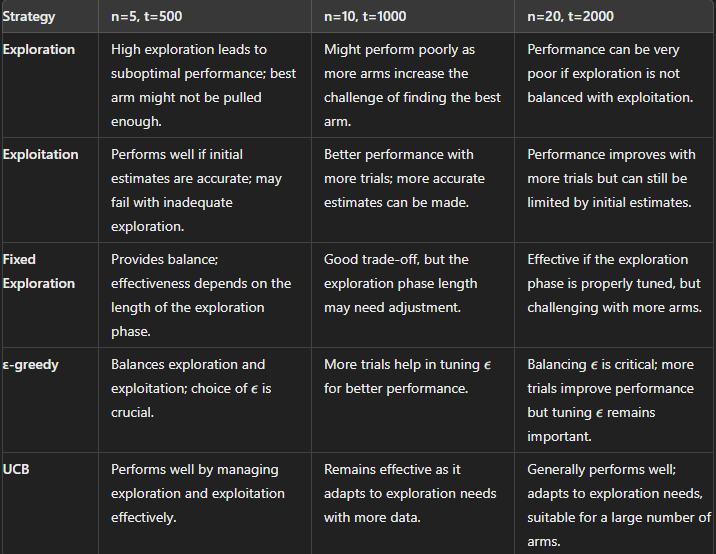

3. Aplpications of Multi Arm Bandit

1. **Online Advertising (Ad Click-Through Rate Optimization)** : In online advertising, companies often need to decide which ads to display to users to maximize engagement and revenue. The goal is to choose the most effective ad to show to each user based on their characteristics and preferences.

2. **Clinical Trials (Drug Testing and Treatment Selection)** : In clinical trials, researchers need to determine which treatment or drug is most effective for patients. Given that different patients may respond differently to various treatments, selecting the most effective treatment based on real-time data is crucial.

